<h1 align="center"> Water Potability </h1>
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## Dataset
Dataset and some of the definitions were downloaded from Kaggle. I would like to thank Kaggle and its vast communitity for making this available to all of us.

This dataset contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import resample
from joblib import dump, load

In [3]:
wq = pd.read_csv('../data/water_potability.csv')
wq.head(n=10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# EDA

In [4]:
print(wq.shape)
print("--------")
print(wq.info())

(3276, 10)
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [5]:
wq.isna().sum()/wq.shape[0]

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

14% of ph, 24% of Sulfate and 5% of Trihalomethanes values are missing. For this analysis I am going to remove observations containing NAs

In [6]:
# Lets drop NAs
wq.dropna(inplace=True)

In [7]:
wq.shape

(2011, 10)

We have 2011 observations left after removing NAs. Let's look at the distributions of these features

In [8]:
wq.iloc[:,0]

3        8.316766
4        9.092223
5        5.584087
6       10.223862
7        8.635849
          ...    
3267     8.989900
3268     6.702547
3269    11.491011
3270     6.069616
3271     4.668102
Name: ph, Length: 2011, dtype: float64

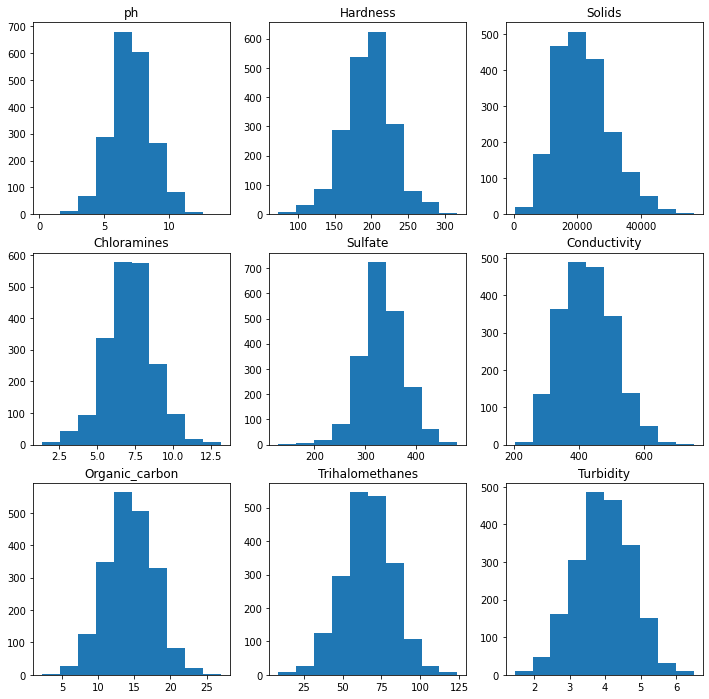

In [9]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
col = 0
for i in range(0,3):
    for j in range(0,3):
        col = col        
        ax[i,j].hist(wq.iloc[:,col])
        ax[i,j].set_title(wq.columns[col])
        col += 1

plt.show()        

Distribution appear symmetrical. I will scale the feature during modeling.

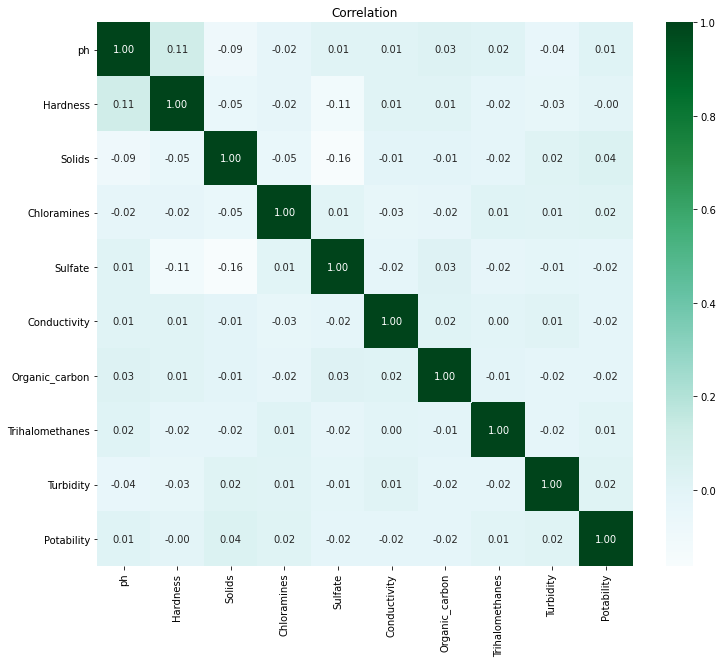

In [12]:
# Let look at the correlation between features and the response(potability)
plt.figure(figsize=(12,10))
sns.heatmap(wq.corr(), annot=True, cmap='BuGn', fmt='.2f')
plt.title("Correlation")
plt.savefig("../static/images/correlation.png")
plt.show()

## Potability of water is very weakly correlated with the features in the dataset. It would be interesting to see if these features can collectively predict potability.

In [47]:
wq.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

The dataset is slightly unbalanced as we have 811 observations with potable water and 1200 observations with non-potable water. In this analysis, I am going to upsample the non-potable observations to have a balanced dataset i.e. equal number of positives(potable) and negatives(non-potable)

# Modeling

In [48]:
random_state = 7 
X = wq.drop(['Potability'], axis=1).to_numpy()
y = wq['Potability'].to_numpy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state, stratify=y)

In [50]:
def upsample_train_data(X, y):
    ''' upsample the minority class '''
    df = pd.concat([pd.DataFrame(X),pd.DataFrame(y, columns=['outcome'])], axis=1)
    
    val_counts = df.outcome.value_counts()
    val_counts = dict(val_counts)    
    
    high_count = max(val_counts, key= val_counts.get)
    low_count  = min(val_counts, key= val_counts.get)
   
    df_high = df[df.outcome == high_count]
    df_low = df[df.outcome == low_count]   
    df_low = resample(df_low, n_samples=val_counts.get(high_count), replace=True, random_state=random_state)
    
    df = pd.concat([df_high, df_low], axis=0, ignore_index=True)
    X = df.drop('outcome', axis=1).to_numpy()
    y = df['outcome'].to_numpy()
    
    return X, y   

In [51]:
models = [("model_RF", RandomForestClassifier()), ("model_Ada", AdaBoostClassifier()), ("model_KNN", KNeighborsClassifier())]

param_grids = [
              {
               "model_RF__min_samples_leaf" : [2,4],
               "model_RF__criterion" : ['gini','entropy'],
               "model_RF__n_estimators" : [250,500],
               "model_RF__random_state" : [random_state]  
              },
              {
               "model_Ada__n_estimators" :range(50,200,50),
               "model_Ada__random_state" : [random_state]  
              },
              {
                "model_KNN__n_neighbors" :range(2, 75, 10)                  
              }             
             ]

In [52]:
for i in range(0,3):
    pipeline = Pipeline(steps=
                        [
                         ('StdScaler',StandardScaler()),
                         models[i]
                        ]
                       )
    gridsearch = GridSearchCV(estimator=pipeline, param_grid = param_grids[i], cv=5, refit='Accuracy', scoring={'AUC':'roc_auc','Accuracy': make_scorer(accuracy_score)}, return_train_score=False)
    cv = gridsearch.fit(X_train, y_train)
    print(gridsearch.best_estimator_)
    print(accuracy_score(y_test, gridsearch.best_estimator_.predict(X_test)))
    print('**********************************************************')

Pipeline(steps=[('StdScaler', StandardScaler()),
                ('model_RF',
                 RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                                        n_estimators=500, random_state=7))])
0.7029702970297029
**********************************************************
Pipeline(steps=[('StdScaler', StandardScaler()),
                ('model_Ada',
                 AdaBoostClassifier(n_estimators=100, random_state=7))])
0.5841584158415841
**********************************************************
Pipeline(steps=[('StdScaler', StandardScaler()),
                ('model_KNN', KNeighborsClassifier(n_neighbors=32))])
0.698019801980198
**********************************************************


# We get highest accuracy of 70.29% on test data using RandomForestClassifier. 

In [1]:
from joblib import dump, load

model = load('../models/water_potability.pkl')
print(model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model_rf', RandomForestClassifier())]),
             param_grid={'model_rf__criterion': ['gini', 'entropy'],
                         'model_rf__min_samples_leaf': [2, 4, 6],
                         'model_rf__n_estimators': [100, 200],
                         'model_rf__random_state': [7]},
             scoring=make_scorer(accuracy_score), verbose=1)
